In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [3]:
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 
# https://fred.stlouisfed.org/series/WILLREITIND
reit = FredReader(['WILLREITIND'], start=datetime.today() - timedelta(days=365*100)).read()
reit

,WILLREITIND
DATE,
1977-12-30,100.00
1978-01-02,NaN
1978-01-03,NaN
1978-01-04,NaN
1978-01-05,NaN
...,...
2021-10-26,14767.48
2021-10-27,14663.79
2021-10-28,14898.74


In [4]:
# Vanguard Real Estate ETF
vnq = yfin.Ticker('vnq').history(period='max')['Close']
vnq

Date
2004-09-29     23.480833
2004-09-30     23.669235
2004-10-01     24.107285
2004-10-04     24.210920
2004-10-05     24.206213
                 ...    
2021-10-27    108.760002
2021-10-28    110.279999
2021-10-29    109.040001
2021-11-01    109.580002
2021-11-02    109.820000
Name: Close, Length: 4305, dtype: float64

In [5]:
# iShares U.S. Real Estate ETF
iyr = yfin.Ticker('iyr').history(period='max')['Close']
iyr

Date
2000-06-19     14.455743
2000-06-20     14.516990
2000-06-21     14.587916
2000-06-22     14.594367
2000-06-23     14.594367
                 ...    
2021-10-27    109.690002
2021-10-28    110.959999
2021-10-29    109.839996
2021-11-01    110.040001
2021-11-02    110.199997
Name: Close, Length: 5379, dtype: float64

In [6]:
df = pd.DataFrame()
df['reit_ix'] = reit['WILLREITIND']
df['vnq'] = vnq
df['iyr'] = iyr
df

,reit_ix,vnq,iyr
DATE,,,
1977-12-30,100.00,NaN,NaN
1978-01-02,NaN,NaN,NaN
1978-01-03,NaN,NaN,NaN
1978-01-04,NaN,NaN,NaN
1978-01-05,NaN,NaN,NaN
...,...,...,...
2021-10-26,14767.48,109.690002,110.699997
2021-10-27,14663.79,108.760002,109.690002
2021-10-28,14898.74,110.279999,110.959999


In [7]:
df = df.ffill().dropna()
df

,reit_ix,vnq,iyr
DATE,,,
2004-09-29,3298.83,23.480833,27.605335
2004-09-30,3325.37,23.669235,27.777727
2004-10-01,3384.27,24.107285,28.402956
2004-10-04,3394.73,24.210920,28.379805
2004-10-05,3398.07,24.206213,28.467293
...,...,...,...
2021-10-26,14767.48,109.690002,110.699997
2021-10-27,14663.79,108.760002,109.690002
2021-10-28,14898.74,110.279999,110.959999


In [8]:
ret = (df/df.shift(365, freq='D')).dropna()
ret

,reit_ix,vnq,iyr
DATE,,,
2005-09-29,1.281145,1.263106,1.234195
2005-09-30,1.287751,1.273059,1.242191
2005-10-04,1.244989,1.219870,1.197109
2005-10-05,1.220431,1.201162,1.171176
2005-10-06,1.210597,1.193938,1.160696
...,...,...,...
2021-10-22,1.448877,1.413762,1.393736
2021-10-26,1.473324,1.434219,1.411819
2021-10-27,1.490944,1.445231,1.419886


<AxesSubplot:xlabel='DATE'>

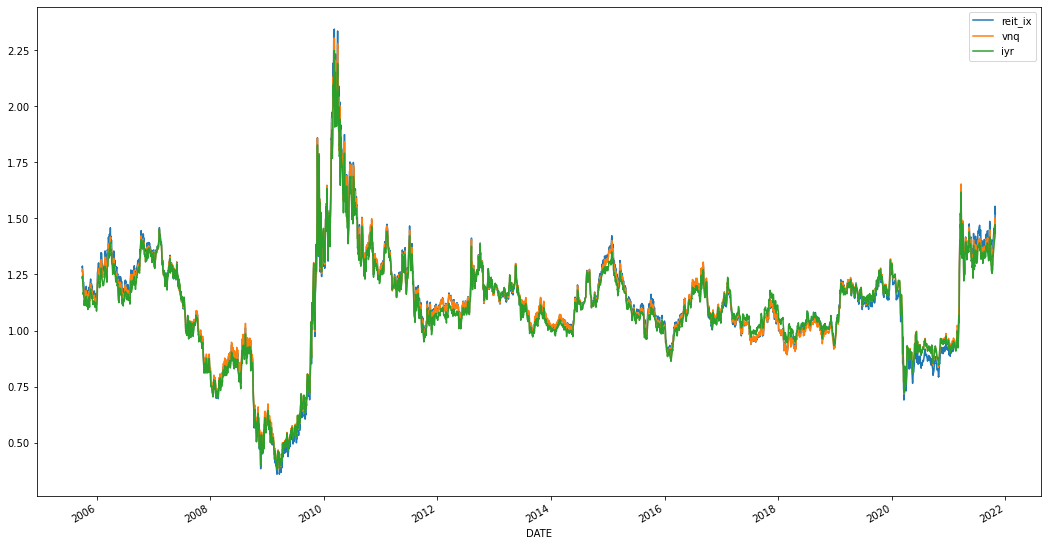

In [9]:
ret.plot()